<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/source/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main/source/utils'):
    from data import get_data

In [3]:
seed = 0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = get_data('LSTM')

In [5]:
model_layers = [
    Input((X_train.shape[1], X_train.shape[2])),

    LSTM(64, return_sequences=False),

    Dense(64, activation='relu'),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                31232     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 36,042
Trainable params: 36,042
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 11s 64ms/step - loss: 2.1704 - accuracy: 0.2617 - val_loss: 1.9966 - val_accuracy: 0.3850
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 1.8806 - accuracy: 0.3883 - val_loss: 1.7736 - val_accuracy: 0.4100
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 1.6762 - accuracy: 0.4467 - val_loss: 1.5935 - val_accuracy: 0.4450
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 1.4936 - accuracy: 0.5217 - val_loss: 1.4426 - val_accuracy: 0.5300
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 1.3280 - accuracy: 0.5900 - val_loss: 1.2994 - val_accuracy: 0.5950
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 1.1674 - accuracy: 0.6333 - val_loss: 1.1860 - val_accuracy: 0.6450
Epoch 7/50
10/10 [==============================] - 0s 12ms/step - loss: 1.0189 - accuracy: 0.6933 - val_loss: 1.0960 - val_accuracy: 0.6800
Epoch 8/50
10/10

In [9]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Training Accuracy: 1.0


In [10]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 3ms/step


In [11]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       1.00      0.90      0.95        20
           2       0.70      0.70      0.70        20
           3       0.75      0.75      0.75        20
           4       0.84      0.80      0.82        20
           5       0.90      0.95      0.93        20
           6       0.95      0.95      0.95        20
           7       0.88      0.75      0.81        20
           8       0.68      0.75      0.71        20
           9       0.64      0.70      0.67        20

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



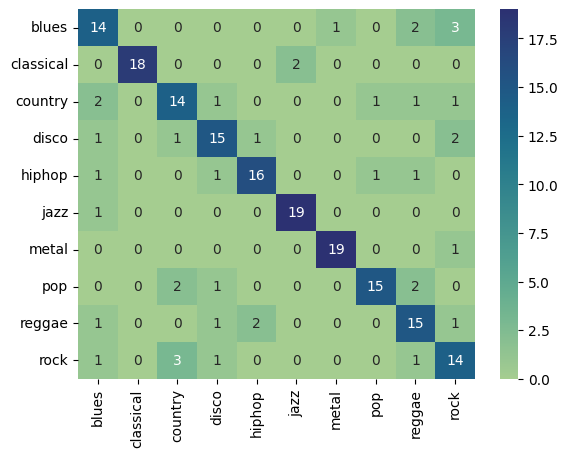

In [12]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('LSTM_Confusion_Matrix.png', dpi=300)

In [13]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.795


In [14]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.70
classical,0.90
country,0.70
disco,0.75
hiphop,0.80
jazz,0.95
metal,0.95
pop,0.75
reggae,0.75
rock,0.70


In [15]:
model.save('LSTM.h5')